# Exponentially Weighted Moving Average
- value the most recent data more
- it differs from SMA becasue it is less suceptible to skews from outliers 
- smaller data windows in sma have more noise EWMA reduces that
- sma never reaches full peak or valley fo data because of averaging

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [2]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [3]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.3+ KB


The date times are floats and there are missing values

In [8]:
airline.dropna(inplace=True)

In [12]:
airline.index = pd.to_datetime(airline.index)
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
airline['6-month-sma'] = airline['Thousands of Passengers'].rolling(window=6).mean()
#our periods are 1 month each

In [14]:
airline['12-month-sma'] = airline['Thousands of Passengers'].rolling(window=12).mean()

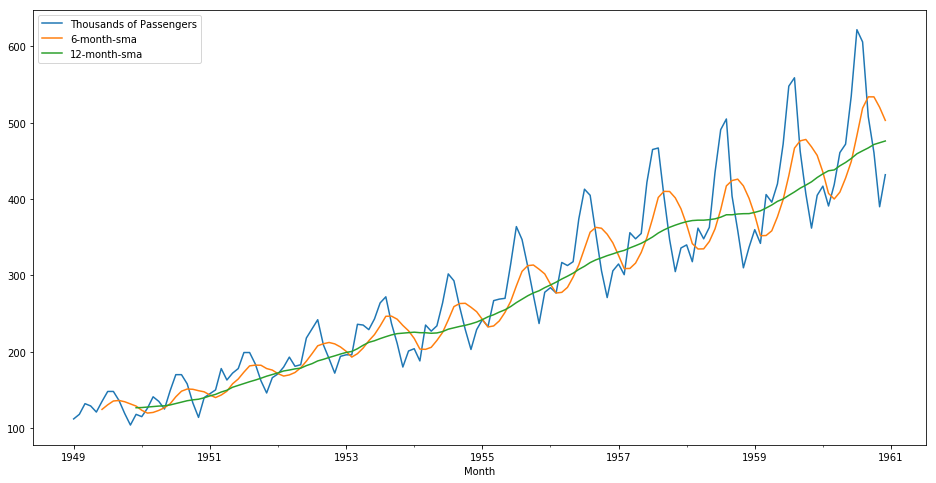

In [17]:
airline.plot(figsize=(16,8))

In [18]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

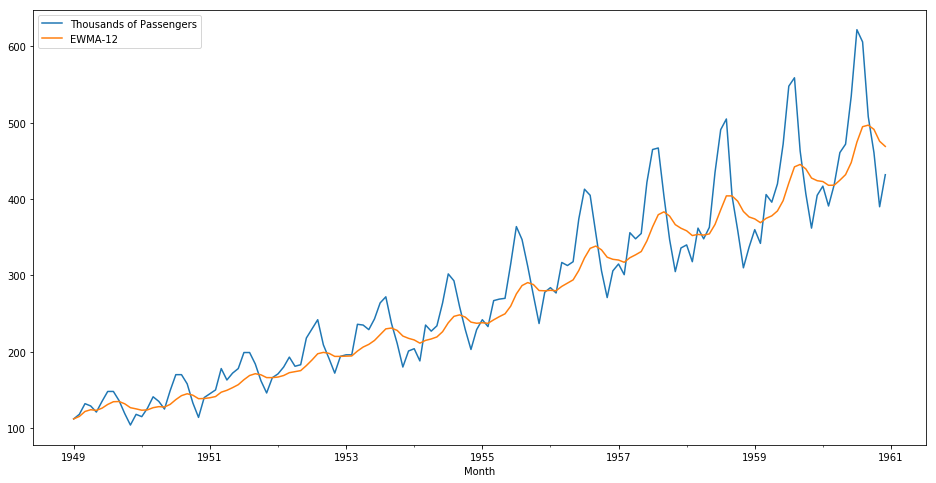

In [20]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(16,8));

# Formula for EWMA
$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

- y value at time t 
- w is weight 

- when adjust = True  which is default fo ewm
### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

- When adjust is False 
### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

# How to define alpha 

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.